In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Carregando a imagem em preto e branco
gray_img = cv2.imread('Little Red Riding Hood.jpg', 0)

#Propriedades da imagem
img_height = gray_img.shape[0] #Número de linhas
img_width = gray_img.shape[1] #Número de colunas

In [2]:
#Criando um array com 256 0's, o nosso histograma
hist = [0]*256

for i in range(img_height):
    for j in range(img_width):
        gray_value = gray_img[i,j]
        hist[gray_value] += 1
        
print(hist)

[415, 145, 206, 253, 321, 366, 456, 538, 583, 705, 799, 871, 974, 1053, 1141, 1172, 1266, 1275, 1363, 1409, 1398, 1417, 1473, 1478, 1500, 1549, 1542, 1540, 1576, 1638, 1662, 1629, 1697, 1785, 1803, 1836, 1890, 1875, 1878, 1945, 1904, 1927, 1978, 2073, 2014, 2052, 2093, 2065, 2152, 2180, 2119, 2214, 2159, 2247, 2240, 2231, 2317, 2396, 2391, 2468, 2573, 2642, 2655, 2816, 2775, 2903, 3109, 3173, 3257, 3182, 3494, 3496, 3564, 3615, 3741, 3826, 3765, 3832, 3811, 3805, 3782, 3830, 3830, 3639, 3603, 3481, 3534, 3387, 3319, 3307, 3127, 3183, 3221, 2979, 3018, 3010, 2853, 2761, 2741, 2635, 2641, 2656, 2561, 2447, 2536, 2389, 2337, 2268, 2348, 2171, 2192, 2212, 2205, 2133, 2101, 1986, 2006, 2037, 2090, 1975, 1962, 1920, 1904, 1950, 1854, 1823, 1827, 1873, 1874, 1780, 1711, 1695, 1699, 1698, 1739, 1712, 1694, 1591, 1663, 1580, 1618, 1592, 1576, 1589, 1507, 1520, 1537, 1447, 1418, 1499, 1414, 1440, 1401, 1390, 1408, 1325, 1329, 1281, 1265, 1255, 1223, 1215, 1130, 1108, 1041, 999, 967, 928, 970, 89

<BarContainer object of 256 artists>

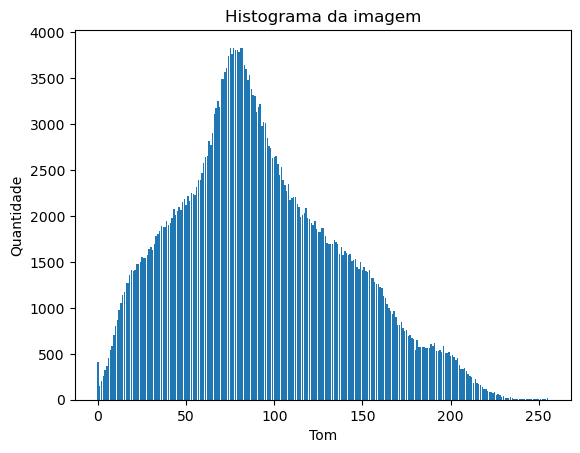

In [3]:
plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma da imagem')

var_eixo_x = list(range(256))
plt.bar(var_eixo_x, hist)

<BarContainer object of 256 artists>

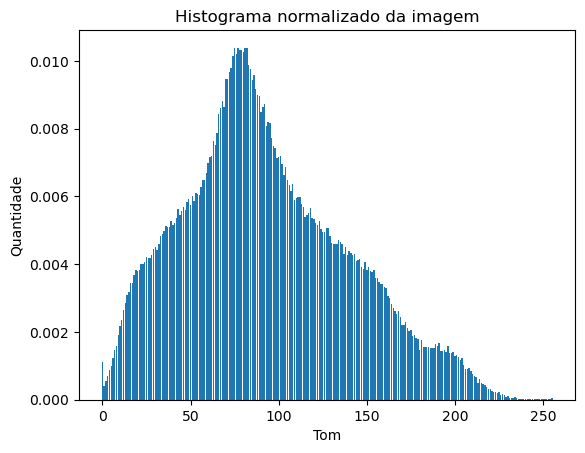

In [4]:
#Criando um histograma normalizado
norm_hist = [0]*256

n_pixels = img_height * img_width

for i in range(256):
    norm_hist[i] = hist[i]/n_pixels
    
plt.xlabel('Tom')
plt.ylabel('Quantidade')
plt.title('Histograma normalizado da imagem')
plt.bar(var_eixo_x, norm_hist)

<BarContainer object of 256 artists>

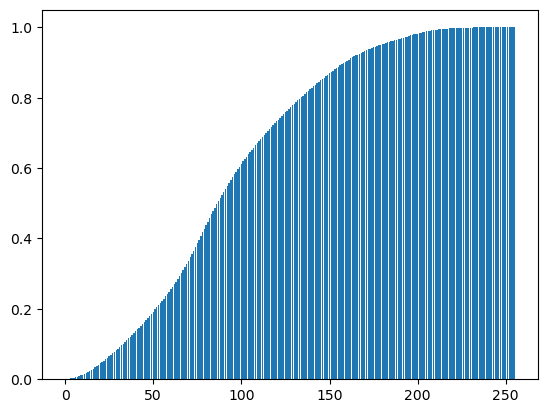

In [5]:
#Acumulando o histograma normalizado

ac_norm_hist = [0]*256

for i in range(256):
        if i == 0:
            ac_norm_hist[i] = norm_hist[i]
        ac_norm_hist[i] = ac_norm_hist[i-1] + norm_hist[i]
        
plt.bar(var_eixo_x, ac_norm_hist)

<BarContainer object of 256 artists>

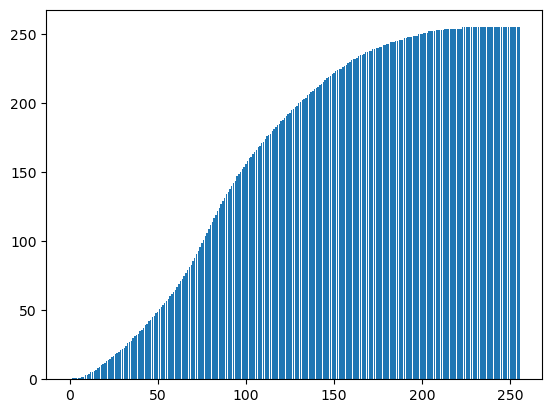

In [6]:
#Equalizando o histograma
eq_hist = ac_norm_hist.copy()

for i in range(256):
    eq_hist[i] = round(eq_hist[i]*255)
    
plt.bar(var_eixo_x, eq_hist)

In [7]:
#Fazendo uma imagem equalizada
eq_img = np.zeros(gray_img.shape[:2], dtype = 'uint8')

for i in range(img_height):
    for j in range(img_width):
        eq_img[i,j] = eq_hist[gray_img[i,j]]
        
cv2.imshow('Imagem cinza', gray_img)
cv2.imshow('Imagem equalizada', eq_img)
cv2.waitKey()

-1

<BarContainer object of 256 artists>

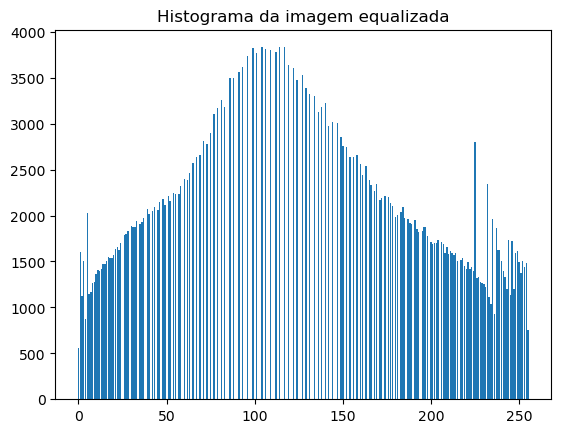

In [8]:
#Tirando o histograma da imagem equalizada
eq_img_hist = 256*[0]

for i in range(img_height):
    for j in range(img_width):
        gray_value = eq_img[i,j]
        eq_img_hist[gray_value]+= 1
        
plt.title('Histograma da imagem equalizada')
plt.bar(var_eixo_x, eq_img_hist)

## Criando um custom histograma

<BarContainer object of 256 artists>

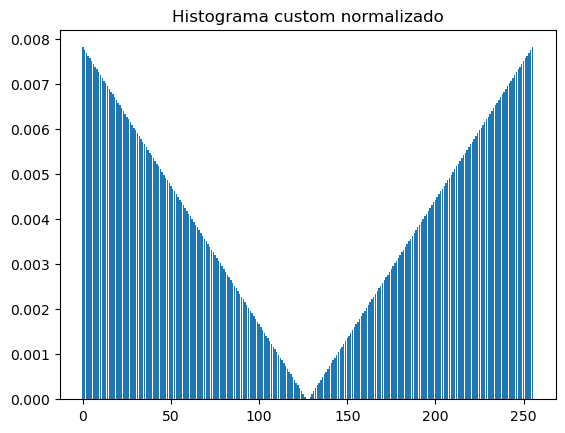

In [38]:
custom_hist = [0]*256
totalPixels = img_height*img_width


for i in range(128):
    custom_hist[i] = (1-(i/127))*(totalPixels/2)/64
for i in range(127,255):
    custom_hist[i+1] = -(1-(i/127))*(totalPixels/2)/64


#Normalizando o custom hist

norm_custom_hist = [0]*256

for i in range(256):
    norm_custom_hist[i] = custom_hist[i]/totalPixels

plt.title('Histograma custom normalizado')
plt.bar(var_eixo_x, norm_custom_hist)

<BarContainer object of 256 artists>

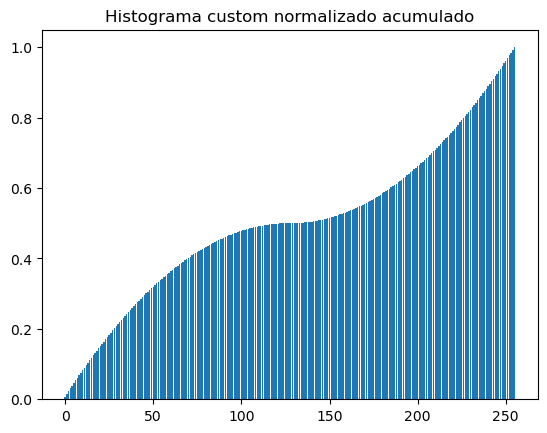

In [39]:
#Acumulando o custom histograma normalizado

ac_norm_custom_hist = [0]*256

for i in range(256):
    if i == 0:
        ac_norm_custom_hist[i] = norm_custom_hist[i]
    ac_norm_custom_hist[i] = norm_custom_hist[i] + ac_norm_custom_hist[i-1]
    
plt.title('Histograma custom normalizado acumulado')
plt.bar(var_eixo_x, ac_norm_custom_hist)

<BarContainer object of 256 artists>

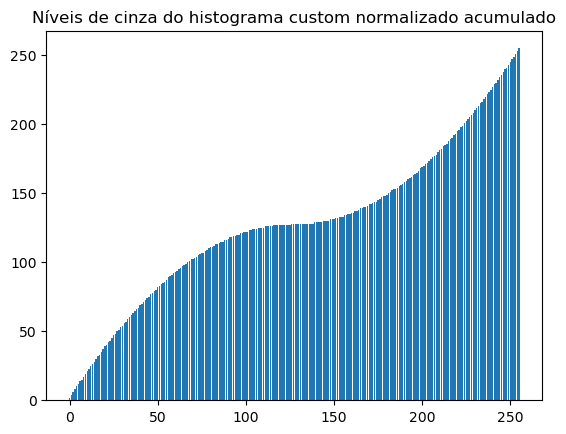

In [43]:
#Calculando o nível de cinza do histograma custom normalizado acumulado
nv_cinza_ac_norm_custom_hist = [0]*256

for i in range(256):
    nv_cinza_ac_norm_custom_hist[i] = round(ac_norm_custom_hist[i]*255)

plt.title('Níveis de cinza do histograma custom normalizado acumulado')
plt.bar(var_eixo_x, nv_cinza_ac_norm_custom_hist)

In [47]:
#Fazendo o mapeamento e especificando a imagem
def mapeamento(equaliz, acumulado):
    mapa2 = {}
    for valor in equaliz:
        menor = abs(valor-acumulado[0])
        menor_indice = 0
        for j in range(len(acumulado)):
            if abs(valor-acumulado[j]) < menor:
                menor = abs(valor-acumulado[j])
                menor_indice = j
        mapa2[valor] = menor_indice
        
    return mapa2

mapa2 = mapeamento(eq_hist,nv_cinza_ac_norm_custom_hist)

imagem_esp = np.zeros(gray_img.shape[:2], dtype = 'uint8')

#Especificando a imagem
for i in range(img_height):
    for j in range(img_width):
        imagem_esp[i,j] = mapa2[eq_hist[gray_img[i,j]]]
        
cv2.imshow('Imagem cinza', gray_img)
cv2.imshow('Imagem especificada', imagem_esp)
cv2.waitKey()

-1

<BarContainer object of 256 artists>

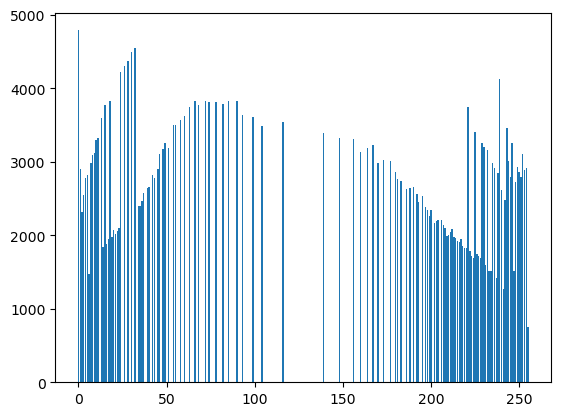

In [50]:
#Tirando o histograma da imagem especificada
esp_img_hist = [0]*256

for i in range(img_height):
    for j in range(img_width):
        gray_value = imagem_esp[i,j]
        esp_img_hist[gray_value] += 1
        
plt.bar(var_eixo_x, esp_img_hist)